<a href="https://colab.research.google.com/github/ykitaguchi77/statistics_for_articles/blob/main/Canalicular_excision_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Canalicular excision**

In [70]:
# prompt: drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Fluo Values Statistics (Min, 25%, Median, 75%, Max):
                      Fluo_pre  Fluo_3M  Fluo_12M
n                        40.00     40.0      40.0
Min                       1.00      0.0       0.0
25th Percentile (Q1)      6.75      2.0       3.0
Median (Q2)               9.00      3.0       4.0
75th Percentile (Q3)     12.00      6.0       7.5
Max                      15.00     15.0      15.0


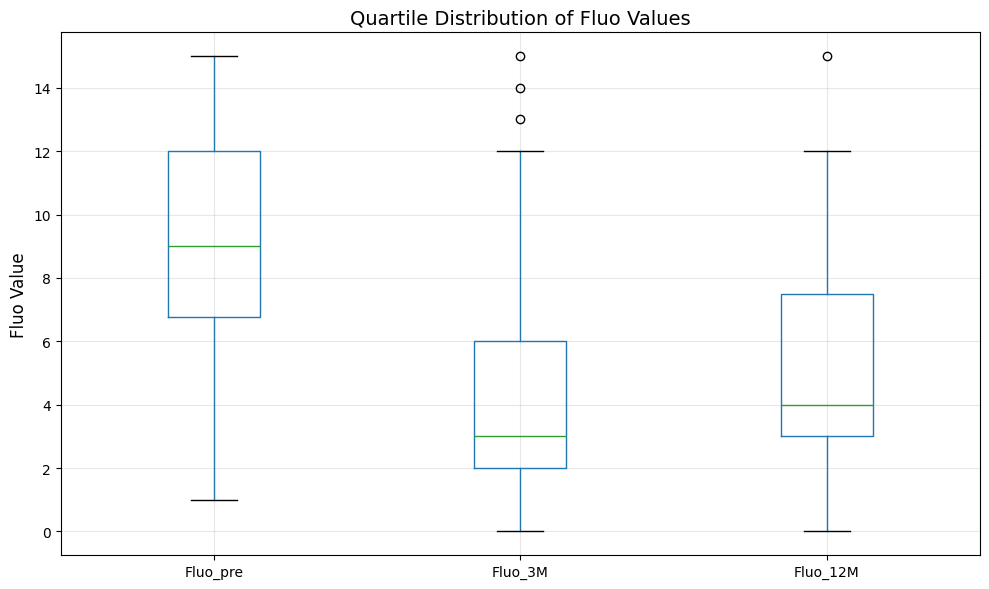

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

'''
1涙点のみの閉塞症例を除外し、Fluo値の事前測定値（Fluo_pre）および術後3か月（Fluo_3M）・12か月（Fluo_12M）
のデータについて、基本統計量（最小値、中央値、四分位点など）を計算し、ボックスプロットで可視化
'''

# Load the specific sheet to extract the data
file_path = '/content/drive/Shareddrives/岩崎Dr_IgG4 deulk/涙小管切断術/涙小管切除術kitaguchi.xlsx'
data = pd.read_excel(file_path, sheet_name='症例_疾患')

# Exclude data in which only one punctum was occuluded
exclude_single_punctum = False
if exclude_single_punctum == True:
    filtered_data = data[data['Both_punctum'] != 0]
else:
    filtered_data = data

# Step 2: Extract relevant columns for Fluo data
fluo_data = filtered_data[['Fluo_pre', 'Fluo_3M', 'Fluo_12M']]

# Step 3: Calculate statistics (Min, 25%, Median, 75%, Max)
stats_table = pd.DataFrame({
    'n': fluo_data.count(),
    'Min': fluo_data.min(),
    '25th Percentile (Q1)': fluo_data.quantile(0.25),
    'Median (Q2)': fluo_data.median(),
    '75th Percentile (Q3)': fluo_data.quantile(0.75),
    'Max': fluo_data.max()
}).transpose()

# Step 4: Display the statistics
print("\nFluo Values Statistics (Min, 25%, Median, 75%, Max):")
print(stats_table)

# Step 5: Plotting boxplot to visualize the quartiles for each timepoint
plt.figure(figsize=(10, 6))
fluo_data.boxplot(column=['Fluo_pre', 'Fluo_3M', 'Fluo_12M'])

# Customizing the graph
plt.title('Quartile Distribution of Fluo Values', fontsize=14)
plt.ylabel('Fluo Value', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Step 6: Display the graph
plt.show()



TM Values Statistics (Min, 25%, Median, 75%, Max):
                         TM_pre      TM_3M     TM_12M
n                     40.000000  40.000000  40.000000
Min                    0.050250   0.114770   0.090000
25th Percentile (Q1)   0.095501   0.203654   0.157491
Median (Q2)            0.129426   0.285532   0.244326
75th Percentile (Q3)   0.157895   0.323455   0.329586
Max                    0.240000   0.714286   0.428571


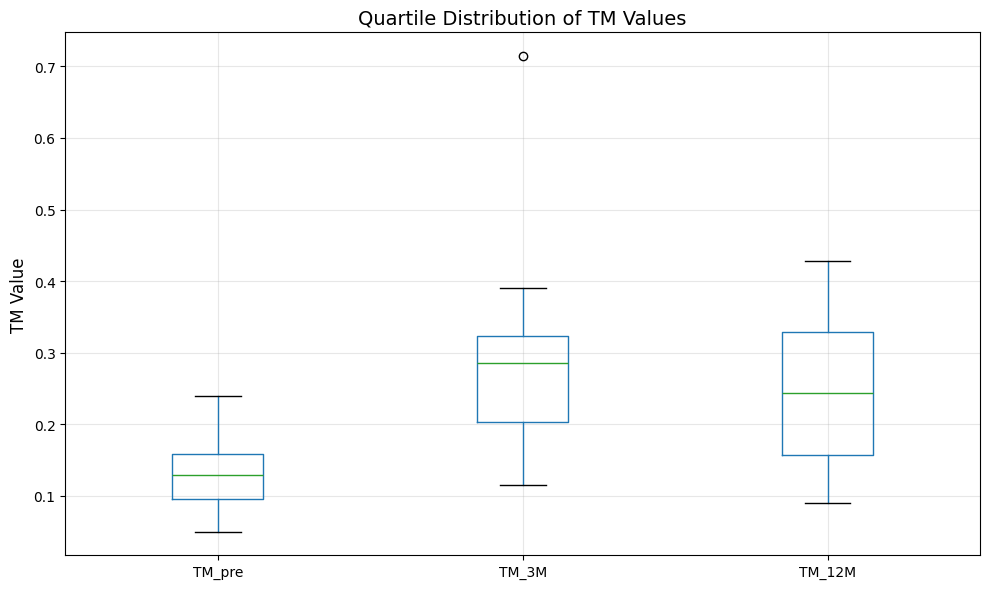

In [73]:
'''
1涙点のみの閉塞症例を除外し、TM値の事前測定値（TM_pre）および術後3か月（TM_3M）・12か月（TM_12M）
のデータについて、基本統計量（最小値、中央値、四分位点など）を計算し、ボックスプロットで可視化
'''

# Exclude data in which only one punctum was occuluded
exclude_single_punctum = False
if exclude_single_punctum == True:
    filtered_data = data[data['Both_punctum'] != 0]
else:
    filtered_data = data

# Step 2: Extract relevant columns for TM data
TM_data = filtered_data[['TM_pre', 'TM_3M', 'TM_12M']]

# Step 3: Calculate statistics (Min, 25%, Median, 75%, Max)
stats_table = pd.DataFrame({
    'n': TM_data.count(),
    'Min': TM_data.min(),
    '25th Percentile (Q1)': TM_data.quantile(0.25),
    'Median (Q2)': TM_data.median(),
    '75th Percentile (Q3)': TM_data.quantile(0.75),
    'Max': TM_data.max()
}).transpose()

# Step 4: Display the statistics
print("\nTM Values Statistics (Min, 25%, Median, 75%, Max):")
print(stats_table)

# Step 5: Plotting boxplot to visualize the quartiles for each timepoint
plt.figure(figsize=(10, 6))
TM_data.boxplot(column=['TM_pre', 'TM_3M', 'TM_12M'])

# Customizing the graph
plt.title('Quartile Distribution of TM Values', fontsize=14)
plt.ylabel('TM Value', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Step 6: Display the graph
plt.show()


In [74]:
import pandas as pd
from scipy.stats import mannwhitneyu, shapiro

'''
Fluo_12M値で患者を2つのグループ（Group1: 3以下, Group2: 3より大きい）に分け、複数の変数における統計的比較を行う。
1. 1涙点のみの閉塞症例を除外
2. Fluo_12Mを基準に2つのグループに分割
3. Mann-Whitney U検定でグループ間の差を評価
'''

# Exclude data in which only one punctum was occuluded
exclude_single_punctum = False
if exclude_single_punctum == True:
    filtered_data = data[data['Both_punctum'] != 0]
else:
    filtered_data = data


# Perform full analysis including sample sizes
if exclude_single_punctum == True:
    columns_to_compare = ['TM_pre', 'TM_3M', 'TM_12M', 'Pre Schirmer I', 'Fluo_pre', 'Fluo_3M']
else:
    columns_to_compare = ['TM_pre', 'TM_3M', 'TM_12M', 'Pre Schirmer I', 'Fluo_pre', 'Fluo_3M', 'Both_punctum']

# Create groups based on 'Fluo_12M'
group_4_or_below = filtered_data[filtered_data['Fluo_12M'] <= 3][columns_to_compare]
group_above_4 = filtered_data[filtered_data['Fluo_12M'] > 3][columns_to_compare]

# Dictionary to store results
comparison_results_full = {}

for column in columns_to_compare:
    # Extract group values
    group_1_values = group_4_or_below[column].dropna()
    group_2_values = group_above_4[column].dropna()

    # Shapiro-Wilk normality test
    _, p_value_group1 = shapiro(group_1_values)
    _, p_value_group2 = shapiro(group_2_values)

    # Mann-Whitney U test
    u_stat, mw_p_value = mannwhitneyu(group_1_values, group_2_values, alternative='two-sided')

    # Summary stats
    stats_group_1 = {
        'Count': group_1_values.count(),
        'Mean': group_1_values.mean(),
        'Median': group_1_values.median(),
        'Std': group_1_values.std(),
        '25th Percentile': group_1_values.quantile(0.25),
        '75th Percentile': group_1_values.quantile(0.75),
    }
    stats_group_2 = {
        'Count': group_2_values.count(),
        'Mean': group_2_values.mean(),
        'Median': group_2_values.median(),
        'Std': group_2_values.std(),
        '25th Percentile': group_2_values.quantile(0.25),
        '75th Percentile': group_2_values.quantile(0.75),
    }

    # Store results
    comparison_results_full[column] = {
        'Group1 Normality p-value': p_value_group1,
        'Group2 Normality p-value': p_value_group2,
        'Mann-Whitney U statistic': u_stat,
        'Mann-Whitney U p-value': mw_p_value,
        'Group 1 Stats': stats_group_1,
        'Group 2 Stats': stats_group_2,
    }

# Compile results into a DataFrame
comparison_summary_full = []

for column, results in comparison_results_full.items():
    comparison_summary_full.append({
        'Column': column,
        'Group1 Mean': results['Group 1 Stats']['Mean'],
        'Group1 Median': results['Group 1 Stats']['Median'],
        'Group1 Std': results['Group 1 Stats']['Std'],
        'Group1 Sample Size': results['Group 1 Stats']['Count'],
        'Group2 Mean': results['Group 2 Stats']['Mean'],
        'Group2 Median': results['Group 2 Stats']['Median'],
        'Group2 Std': results['Group 2 Stats']['Std'],
        'Group2 Sample Size': results['Group 2 Stats']['Count'],
        'Mann-Whitney U p-value': results['Mann-Whitney U p-value']
    })

comparison_df_full = pd.DataFrame(comparison_summary_full)

# Display the full comparison summary including sample sizes to the user
comparison_df_full

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


,Column,Group1 Mean,Group1 Median,Group1 Std,Group1 Sample Size,Group2 Mean,Group2 Median,Group2 Std,Group2 Sample Size,Mann-Whitney U p-value
0,TM_pre,0.132911,0.131416,0.045696,14,0.130034,0.128583,0.044317,26,0.898330
1,TM_3M,0.258979,0.264554,0.088981,14,0.275355,0.288588,0.119942,26,0.691281
2,TM_12M,0.260434,0.232080,0.096150,14,0.244636,0.279510,0.107826,26,0.532581
3,Pre Schirmer I,2.285714,1.500000,2.233609,14,3.038462,2.500000,2.424554,26,0.244568
4,Fluo_pre,6.357143,7.500000,2.977018,14,10.461538,11.000000,3.152533,26,0.001895
5,Fluo_3M,2.857143,2.000000,3.840215,14,5.538462,4.000000,3.931725,26,0.010535
6,Both_punctum,1.000000,1.000000,0.000000,14,0.730769,1.000000,0.452344,26,0.036704


In [75]:
import pandas as pd
from scipy.stats import mannwhitneyu, shapiro

'''
Fluo_12M値で患者を2つのグループ（Group1: 3以下, Group2: 3より大きい）に分け、複数の変数における統計的比較を行う。
1. 1涙点のみの閉塞症例を除外
2. Fluo_12Mを基準に2つのグループに分割
3. Mann-Whitney U検定でグループ間の差を評価
'''

# Exclude data in which only one punctum was occuluded
exclude_single_punctum = True
if exclude_single_punctum == True:
    filtered_data = data[data['Both_punctum'] != 0]
else:
    filtered_data = data


# Perform full analysis including sample sizes
if exclude_single_punctum == True:
    columns_to_compare = ['TM_pre', 'TM_3M', 'TM_12M', 'Pre Schirmer I', 'Fluo_pre', 'Fluo_3M']
else:
    columns_to_compare = ['TM_pre', 'TM_3M', 'TM_12M', 'Pre Schirmer I', 'Fluo_pre', 'Fluo_3M', 'Both_punctum']

# Create groups based on 'Fluo_12M'
group_4_or_below = filtered_data[filtered_data['Fluo_12M'] <= 3][columns_to_compare]
group_above_4 = filtered_data[filtered_data['Fluo_12M'] > 3][columns_to_compare]

# Dictionary to store results
comparison_results_full = {}

for column in columns_to_compare:
    # Extract group values
    group_1_values = group_4_or_below[column].dropna()
    group_2_values = group_above_4[column].dropna()

    # Shapiro-Wilk normality test
    _, p_value_group1 = shapiro(group_1_values)
    _, p_value_group2 = shapiro(group_2_values)

    # Mann-Whitney U test
    u_stat, mw_p_value = mannwhitneyu(group_1_values, group_2_values, alternative='two-sided')

    # Summary stats
    stats_group_1 = {
        'Count': group_1_values.count(),
        'Mean': group_1_values.mean(),
        'Median': group_1_values.median(),
        'Std': group_1_values.std(),
        '25th Percentile': group_1_values.quantile(0.25),
        '75th Percentile': group_1_values.quantile(0.75),
    }
    stats_group_2 = {
        'Count': group_2_values.count(),
        'Mean': group_2_values.mean(),
        'Median': group_2_values.median(),
        'Std': group_2_values.std(),
        '25th Percentile': group_2_values.quantile(0.25),
        '75th Percentile': group_2_values.quantile(0.75),
    }

    # Store results
    comparison_results_full[column] = {
        'Group1 Normality p-value': p_value_group1,
        'Group2 Normality p-value': p_value_group2,
        'Mann-Whitney U statistic': u_stat,
        'Mann-Whitney U p-value': mw_p_value,
        'Group 1 Stats': stats_group_1,
        'Group 2 Stats': stats_group_2,
    }

# Compile results into a DataFrame
comparison_summary_full = []

for column, results in comparison_results_full.items():
    comparison_summary_full.append({
        'Column': column,
        'Group1 Mean': results['Group 1 Stats']['Mean'],
        'Group1 Median': results['Group 1 Stats']['Median'],
        'Group1 Std': results['Group 1 Stats']['Std'],
        'Group1 Sample Size': results['Group 1 Stats']['Count'],
        'Group2 Mean': results['Group 2 Stats']['Mean'],
        'Group2 Median': results['Group 2 Stats']['Median'],
        'Group2 Std': results['Group 2 Stats']['Std'],
        'Group2 Sample Size': results['Group 2 Stats']['Count'],
        'Mann-Whitney U p-value': results['Mann-Whitney U p-value']
    })

comparison_df_full = pd.DataFrame(comparison_summary_full)

# Display the full comparison summary including sample sizes to the user
comparison_df_full

,Column,Group1 Mean,Group1 Median,Group1 Std,Group1 Sample Size,Group2 Mean,Group2 Median,Group2 Std,Group2 Sample Size,Mann-Whitney U p-value
0,TM_pre,0.132911,0.131416,0.045696,14,0.134775,0.130851,0.041870,19,0.869570
1,TM_3M,0.258979,0.264554,0.088981,14,0.303020,0.314286,0.121899,19,0.258613
2,TM_12M,0.260434,0.232080,0.096150,14,0.265925,0.288828,0.106909,19,0.884098
3,Pre Schirmer I,2.285714,1.500000,2.233609,14,3.000000,3.000000,2.134375,19,0.183285
4,Fluo_pre,6.357143,7.500000,2.977018,14,10.894737,11.000000,3.016524,19,0.000812
5,Fluo_3M,2.857143,2.000000,3.840215,14,5.894737,6.000000,4.121687,19,0.013233


In [60]:
import pandas as pd


'''
Fluo_12M値で患者を2つのグループ（Group1: 3以下, Group2: 3より大きい）に分け、疾患ごとの比較を行う。
1. 1涙点のみの閉塞症例を除外
2. Fluo_12Mを基準に2つのグループに分割
3. 疾患ごとのマトリックス表を表示
'''


# Exclude data in which only one punctum was occuluded
exclude_single_punctum = True
if exclude_single_punctum == True:
    filtered_data = data[data['Both_punctum'] != 0]
else:
    filtered_data = data


# Create new groups after exclusion based on 'Fluo_12M'
group_below_filtered = filtered_data[filtered_data['Fluo_12M'] <= 3]
group_above_filtered = filtered_data[filtered_data['Fluo_12M'] > 3]

# Analyze distribution of 'Background' within each group
background_distribution_group_below = group_below_filtered['Background'].value_counts()
background_distribution_group_above = group_above_filtered['Background'].value_counts()

# Combine distributions into a single DataFrame for comparison
background_distribution_comparison = pd.DataFrame({
    'Group Below': background_distribution_group_below,
    'Group Above': background_distribution_group_above
}).fillna(0)

# Display the background distribution comparison
background_distribution_comparison

,Group Below,Group Above
Background,,
GVHD,3,9
OCP,1,2
Others,1,3
autoimmune,9,5


<ipython-input-68-29a27e4aafe3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Background_Group'] = filtered_data['Background'].apply(


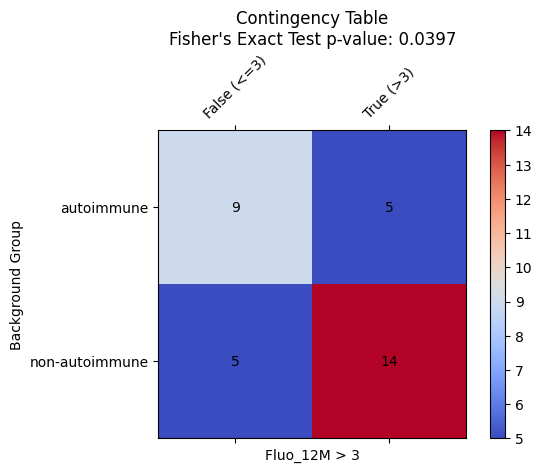

Fisher's Exact Test p-value: 0.0397
Chi-Square Test p-value: 0.0680


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact
from scipy.stats import fisher_exact, chi2_contingency

'''
Autoimmune群とそれ以外群とで、カイ2乗検定
'''

# "autoimmune" と "non-autoimmune" にグループ化
filtered_data['Background_Group'] = filtered_data['Background'].apply(
    lambda x: 'autoimmune' if x == 'autoimmune' else 'non-autoimmune'
)

# コンティンジェンシーテーブルを作成
autoimmune_vs_others_table = pd.crosstab(
    filtered_data['Background_Group'], filtered_data['Fluo_12M'] > 3
)

# Fisher's Exact Test
_, fisher_p_val_autoimmune_vs_others = fisher_exact(autoimmune_vs_others_table)

# マトリックス図の作成と表示
fig, ax = plt.subplots(figsize=(6, 4))
cax = ax.matshow(autoimmune_vs_others_table.values, cmap="coolwarm")

# カラーバーを追加
plt.colorbar(cax)

# 軸ラベルの設定
ax.set_xticks(range(autoimmune_vs_others_table.shape[1]))
ax.set_yticks(range(autoimmune_vs_others_table.shape[0]))
ax.set_xticklabels(['False (<=3)', 'True (>3)'], rotation=45)
ax.set_yticklabels(autoimmune_vs_others_table.index)

# 値を表示
for i in range(autoimmune_vs_others_table.shape[0]):
    for j in range(autoimmune_vs_others_table.shape[1]):
        ax.text(j, i, autoimmune_vs_others_table.values[i, j], va='center', ha='center')

# タイトルと表示
plt.title(f"Contingency Table\nFisher's Exact Test p-value: {fisher_p_val_autoimmune_vs_others:.4f}")
plt.xlabel("Fluo_12M > 3")
plt.ylabel("Background Group")
plt.show()

# Perform Fisher's Exact Test for autoimmune vs non-autoimmune
_, fisher_p_val_autoimmune_vs_others = fisher_exact(autoimmune_vs_others_table)

# カイ二乗検定
chi2_stat, chi2_p_val, _, _ = chi2_contingency(autoimmune_vs_others_table)

# 結果表示
print(f"Fisher's Exact Test p-value: {fisher_p_val_autoimmune_vs_others:.4f}"
      if fisher_p_val_autoimmune_vs_others is not None else "Fisher's Exact Test: Not Applicable")
print(f"Chi-Square Test p-value: {chi2_p_val:.4f}")